In [38]:
#hiding all warnings 
import warnings
warnings.filterwarnings('ignore')
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline as PP

#performance metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#7
#8
#9
#10

In [2]:
#dataset
df = pd.read_csv('income_evaluation (1).csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Understanting

In [3]:
#columns
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
#change the column names
for cols in df.columns:
    df.rename({cols:cols.replace('-','_')},axis=1,inplace=True)
    df.rename({cols:cols.replace(' ','')},axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
#checking for null values
print(f'The number of features that has null values :{df.isnull().any().sum()}')

The number of features that has null values :0


In [7]:
#checking for duplicate values
df.duplicated().sum()

24

In [8]:
#drop the duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#the shape of df
df.shape

(32537, 15)

In [11]:
#describe data on the object dtype
df.describe(include='object').T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
income,32537,2,<=50K,24698


In [12]:
#describe data on the object dtype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [14]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


# Visualizations to get insides from data

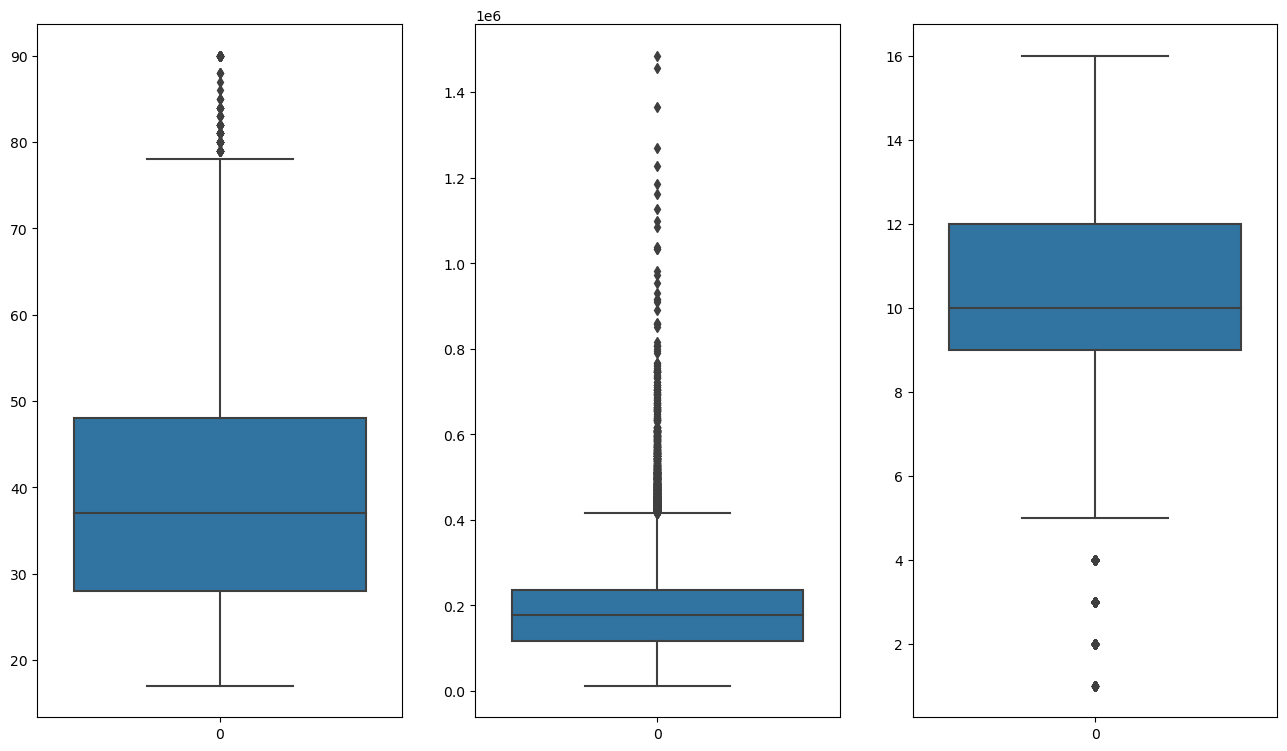

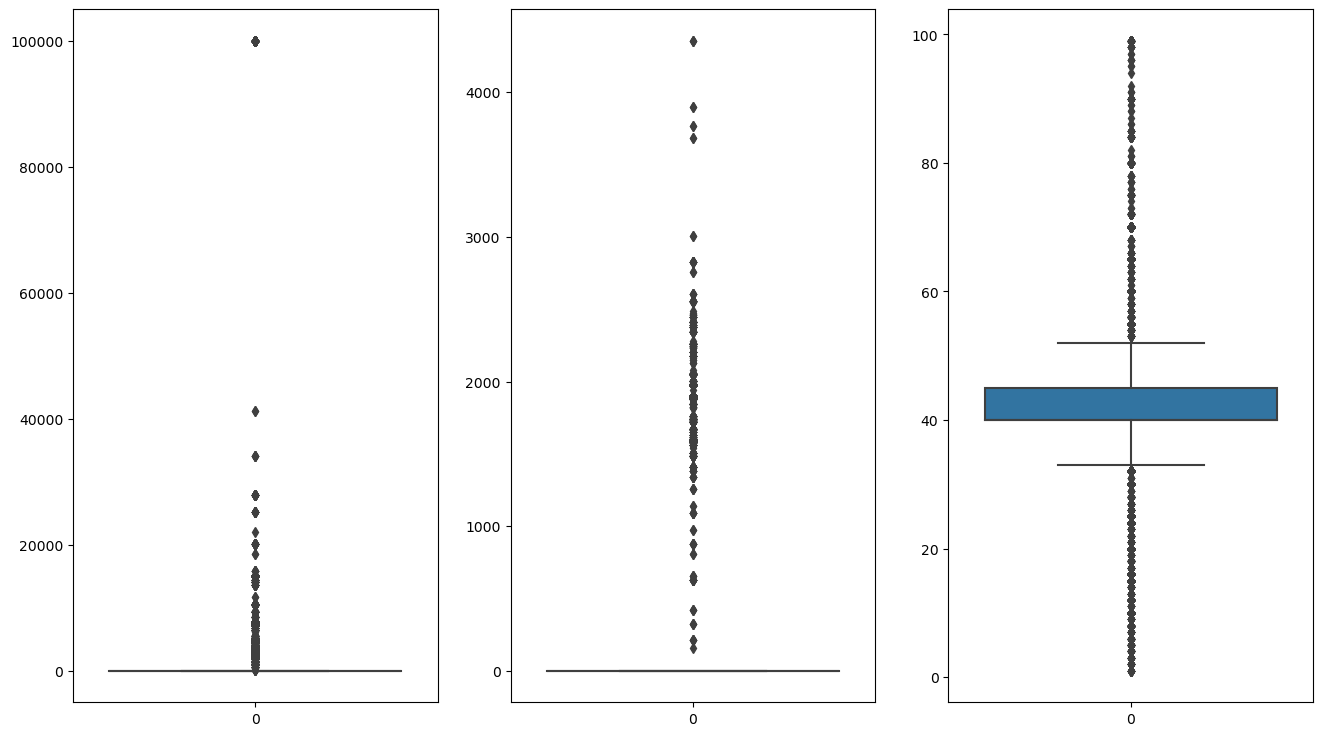

In [15]:
#box plots to see outliers in the data
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.boxplot(df['age'],ax=ax1)
fig = sns.boxplot(df['fnlwgt'],ax=ax2)
fig = sns.boxplot(df['education_num'],ax=ax3)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.boxplot(df['capital_gain'],ax=ax1)
fig = sns.boxplot(df['capital_loss'],ax=ax2)
fig = sns.boxplot(df['hours_per_week'],ax=ax3)

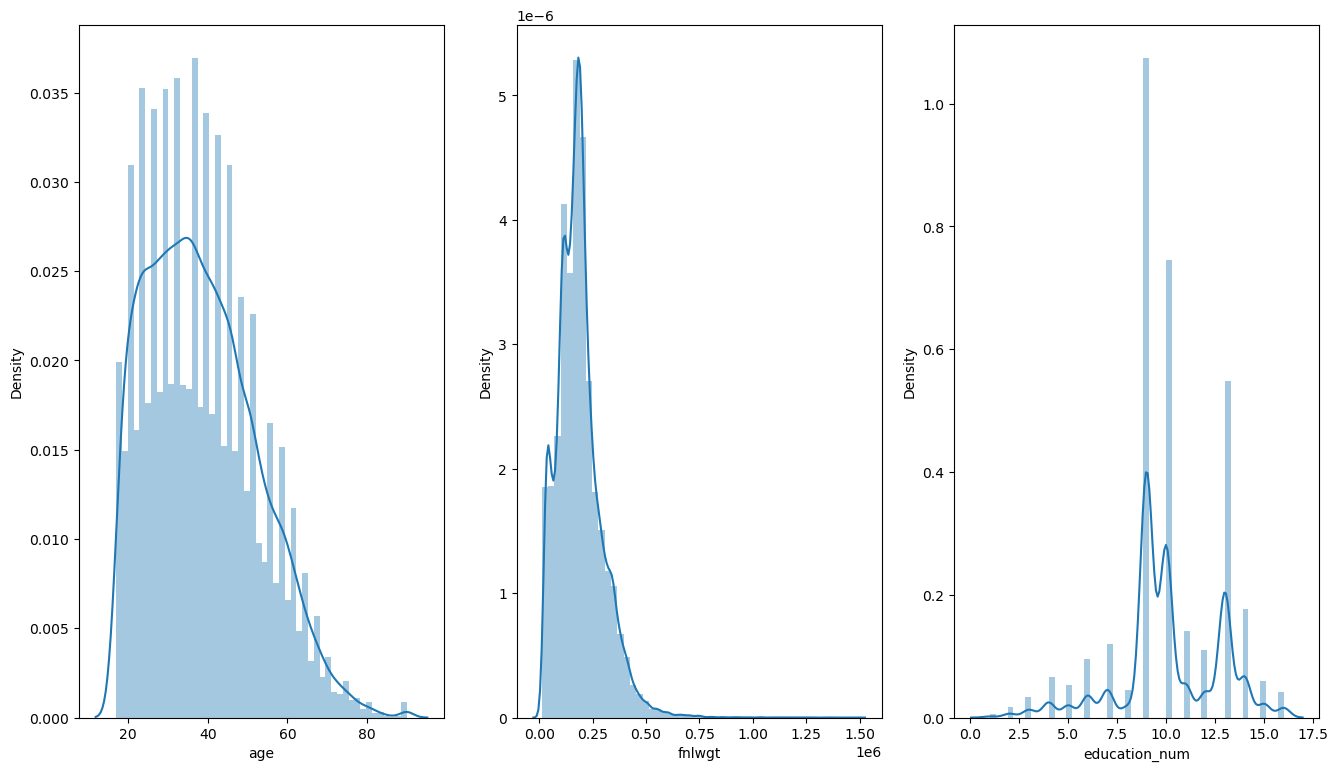

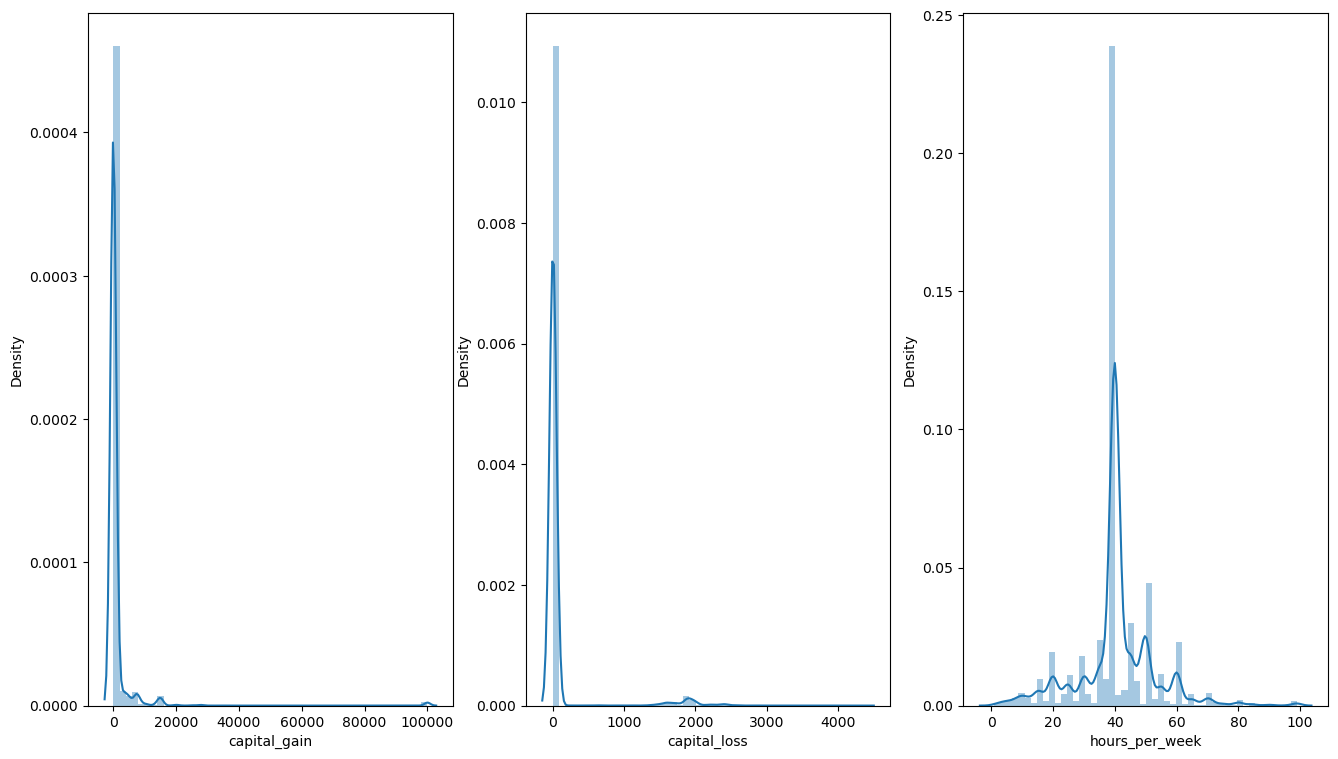

In [16]:
#distplot to show how distrute data
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.distplot(df['age'],ax=ax1)
fig = sns.distplot(df['fnlwgt'],ax=ax2)
fig = sns.distplot(df['education_num'],ax=ax3)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.distplot(df['capital_gain'],ax=ax1)
fig = sns.distplot(df['capital_loss'],ax=ax2)
fig = sns.distplot(df['hours_per_week'],ax=ax3)

plt.show()

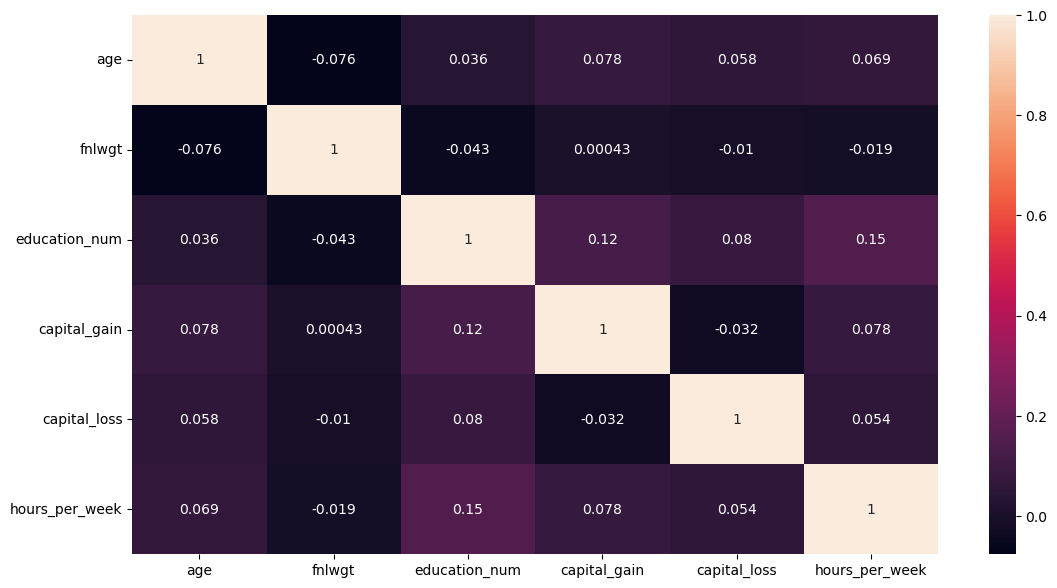

In [17]:
#correlation between features
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Preperation for the modelling

In [18]:
#we only see to the columns that are object to see,we have dirty value or not
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(df[cols].value_counts())
#actually,yes we have
#when we encode them,it is created new class,but they are lioke others countries 
#so let's get changed them to the another class that is coxlu tekrarlanir
#actually,deleting them wouldnot be great idea because of the data itkisi
#that is why we are able to change them another class

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial

In [19]:
#unique values in the object dtypes
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(f"{cols}***************")
        print(df[cols].unique())

workclass***************
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education***************
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status***************
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation***************
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship***************
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race***************
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Othe

In [20]:
#column names that has dirty value(?)
dirty_columns = []
for cols in df.columns:
    if df[cols].dtype == 'object':
        if ' ?' in df[cols].unique():
            dirty_columns.append(cols)
print(dirty_columns)

['workclass', 'occupation', 'native_country']


In [21]:
#the most frequent data in the features that has dirty values
for cols in df.columns:
    if df[cols].dtype == 'object':
        if ' ?' in df[cols].unique():
               print(df[cols].value_counts()[:1])

 Private    22673
Name: workclass, dtype: int64
 Prof-specialty    4136
Name: occupation, dtype: int64
 United-States    29153
Name: native_country, dtype: int64


In [22]:
#changing dirty values(?) to the most frequent data
df['workclass'] = df["workclass"].replace([' ?'], ' Private')
df['occupation'] = df["occupation"].replace([' ?'], ' Prof-specialty')
df['native_country'] = df["native_country"].replace([' ?'], ' United-States')

In [23]:
#change target value(income) to numberds(0 and 1)
df['income'] = df['income'].replace({' <=50K': 0,' >50K': 1})
# df['native_country'] = df['native_country'].replace([' >50K'],0)

In [24]:
# Deleting some features
# education and education-num is the same thing,one of them can be deleted
df.drop('education',axis=1,inplace=True)

In [25]:
#correlation
print(df.corr()['income'])
#correlation is too low(<0.05),let's get delete it
df.drop('fnlwgt',axis=1,inplace=True)

age               0.234037
fnlwgt           -0.009502
education_num     0.335272
capital_gain      0.223336
capital_loss      0.150501
hours_per_week    0.229658
income            1.000000
Name: income, dtype: float64


# Encoding 

In [26]:
from sklearn.preprocessing import OneHotEncoder
#assigning categorical columns
categorical_cols = ['workclass','marital_status','occupation','relationship','race','sex','native_country']

one_hot_encoded_data = pd.get_dummies(df, columns = categorical_cols)
# Converting type of columns to category
df['workclass']=df['workclass'].astype('category')
df['marital_status']=df['marital_status'].astype('category')
df['occupation']=df['occupation'].astype('category')
df['relationship']=df['relationship'].astype('category')
df['race']=df['race'].astype('category')
df['sex']=df['sex'].astype('category')
df['native_country']=df['native_country'].astype('category')
 
# Assigning numerical values and storing it in another columns
df['workclass']=df['workclass'].cat.codes
df['marital_status']=df['marital_status'].cat.codes
df['occupation']=df['occupation'].cat.codes
df['relationship']=df['relationship'].cat.codes
df['race']=df['race'].cat.codes
df['sex']=df['sex'].cat.codes
df['native_country']=df['native_country'].cat.codes
 
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
enc_data=pd.DataFrame(enc.fit_transform(df[categorical_cols]))
 
#Merge with main
New_df=df.join(enc_data)
New_df.drop(New_df.columns[[13]], axis=1, inplace=True)
New_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


# Train Test Spilitting

In [27]:
#choosing target and intepented variables
X = New_df.drop('income',axis=1).values
y = New_df['income'].values
#train test splitting
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Log transformation,Box-Cox and Yoe Johnson Normalization Methods

In [28]:
#numeric features
numeric_features = []
for col in df.columns:
    if df[col].dtype == 'int64':
        numeric_features.append(col)
print(numeric_features)

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']


In [29]:
#skewness and kurtosis in each numeric column
for col in numeric_features:
    print(f'The Skewness of {col}:{df[col].skew()}')
    print(f'The Kurtosis of {col}:{df[col].kurt()}')

The Skewness of age:0.5576631514973126
The Kurtosis of age:-0.16984978541788598
The Skewness of education_num:-0.30950025998998987
The Kurtosis of education_num:0.6190244991834937
The Skewness of capital_gain:11.949402833551463
The Kurtosis of capital_gain:154.68295431938128
The Skewness of capital_loss:4.592702423271812
The Kurtosis of capital_loss:20.358254224040184
The Skewness of hours_per_week:0.22875887785250426
The Kurtosis of hours_per_week:2.917718168965955
The Skewness of income:1.2116874439956897
The Kurtosis of income:-0.5318462336224021


In [30]:
#highly skewness features
high_skew = []
for col in numeric_features:
    if df[col].skew() > 3:
        high_skew.append(col)
        print(f'The Skewnes of {col}:{df[col].skew()}')
        print(f'The Kurtosis of {col}:{df[col].kurt()}')
print(high_skew)
#kurtosis is too high,so the data has heavy tails,we will need any Normalization methods like Log Trans,Yoe Johnson,
#Box-Cox

The Skewnes of capital_gain:11.949402833551463
The Kurtosis of capital_gain:154.68295431938128
The Skewnes of capital_loss:4.592702423271812
The Kurtosis of capital_loss:20.358254224040184
['capital_gain', 'capital_loss']


In [31]:
#checking for minimum values
for col in high_skew:
    print(f'The Minimum of {col}:{df[col].min()}')
#there is no any negative values so,All of methods would be great at this case,but if we have negative values,
#Yoe-Johnson is the only way 
pt = PowerTransformer()
yoe_x_tr = pt.fit_transform(X_train.reshape(-1,1))
yoe_x_te = pt.fit_transform(X_test.reshape(-1,1))

The Minimum of capital_gain:0
The Minimum of capital_loss:0


# Modelling on the 10 models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Naive Bayes
4. Support Vector Machine
5. Decision Tree Classifier
6. Random Forest Classifier

# Using Pipeline

In [35]:
#evaluate all metrics
def print_metrics():
    pass
#printing cross validation score
def cv_score():
    pass
#roc plot
def roc_plot():
    pass

### 1. Logistic Regression 

### 2. K-Nearest Neighbours

### 3. Naive Bayes

### 4. Support Vector Machine

### 5. Decision Tree Classifier

### 6. Random Forest Classifier

# Evaluation metrics

# Compare all evaluation metrics in the all Models 

# Improve Model with Randomized SearchCV on the best model